# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

Load feature names.

In [3]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [8]:
def P1():
### STUDENT START ###
    n_comp = 50
    pca_mod1 = PCA(n_components = n_comp)
    pca_mod1.fit(train_data, train_labels)

    print 'Explained variance ratio: \n', pca_mod1.explained_variance_ratio_ 
    print 'Cumulative explained variance: \n', np.cumsum(pca_mod1.explained_variance_ratio_)    
    print '\nThe first k principal components for k in [1,%s] cumulatively explain %s of the total variance in the training data.' % (n_comp, np.cumsum(pca_mod1.explained_variance_ratio_)[n_comp-1])
### STUDENT END ###

P1()

Explained variance ratio: 
[ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419489  0.00397702
  0.00370043  0.00359528  0.00338124  0.00298987  0.00272031  0.00235706
  0.00221399  0.00204452]
Cumulative explained variance: 
[ 0.16404331  0.2972781   0.39901267  0.46964623  0.50831269  0.54512074
  0.57640313  0.6037405   0.62990541  0.65221483  0.67269656  0.69137987
  0.70872409  0.7255677   0.74075588  0.75584207  0.7701334   0.78425353
  0.79750398  0.80896777  0.81967842  0.83033589  0.84074556  0.85068255
  0.85976325  0.86845651  0.87641268  0

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

(7000, 2)
(3198, 2)
(3802, 2)


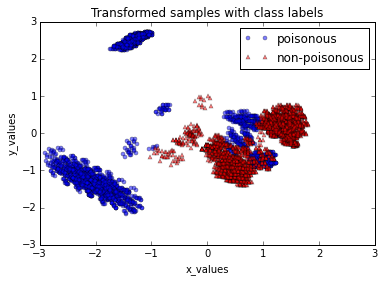

In [31]:
def P2():
### STUDENT START ###
    n_comp = 2
    pca_mod2 = PCA(n_components = n_comp)
    train_data_2d = pca_mod2.fit_transform(train_data, train_labels)  
    pos_train_data_2d = train_data_2d[train_labels==1] # positive (poisonous) cases
    neg_train_data_2d = train_data_2d[train_labels==0] # negative (non-poisonous) cases
    
    print train_data_2d.shape
    print pos_train_data_2d.shape
    print neg_train_data_2d.shape
    
    # Plot using  the first dimension as the x-axis and the second dimension as the y-axis
    plt.plot(pos_train_data_2d[:,0], pos_train_data_2d[:,1], 'o', markersize=4,\
             color='blue', alpha=0.5, label='poisonous')
    plt.plot(neg_train_data_2d[:,0], neg_train_data_2d[:,1], '^', markersize=4,\
             color='red', alpha=0.5, label='non-poisonous')
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.legend()
    plt.title('Transformed samples with class labels')

    plt.show()
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

Cluster 0 shape: (677, 2)
Cluster center: [ 0.0781692  -0.18092486]
Max distance for cluster: 1.27739215659

Cluster 1 shape: (1060, 2)
Cluster center: [-1.31887122  2.49722569]
Max distance for cluster: 0.478976951566

Cluster 2 shape: (1400, 2)
Cluster center: [-2.01753926 -1.31002886]
Max distance for cluster: 1.35709270001

Cluster 3 shape: (2463, 2)
Cluster center: [ 1.33763838  0.1954023 ]
Max distance for cluster: 0.85516080227

Cluster 4 shape: (1400, 2)
Cluster center: [ 0.629581   -0.83976269]
Max distance for cluster: 0.661126368387



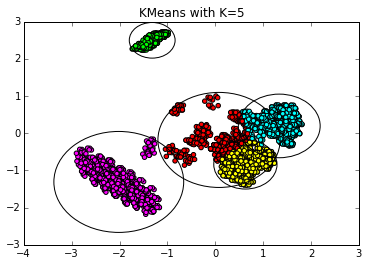

In [64]:
def P3():
### STUDENT START ###
    n_comp = 2
    pca_mod3 = PCA(n_components = n_comp)
    train_data_2d = pca_mod3.fit_transform(train_data, train_labels) 
    
    K = 5
    km = KMeans(n_clusters=K)
    km.fit(train_data_2d)
    
    # Setup colors and colormap for plotting
    colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00']
    cm_bright = ListedColormap(colors)
    clusters = km.predict(train_data_2d)
    
    # Create scatterplot using the first dimension as the x-axis and second dimension as the y-axis and using our colormap
    plt.scatter(train_data_2d[:, 0], train_data_2d[:, 1], c=clusters, cmap=cm_bright)
    plt.title('KMeans with K=%s' % K)
    
    # Get the center coordinates for each cluster
    km_cc = km.cluster_centers_
    
    # Loop through the clusters
    for i in range(K):
        distances = [] # Initialize a list to hold the distances of every point in the cluster
        cluster = train_data_2d[clusters==i] # Select the ith cluster
        for point in cluster:
            distance = np.linalg.norm(km_cc[i]-point) # Calculate the distance between the point and the center
            distances.append(distance) # Add it to the list
        max_dist = max(distances) # Retrieve the biggest distance
        
        print "Cluster %s shape: %s" % (i, cluster.shape)
        print "Cluster center: %s" % km_cc[i]
        print "Max distance for cluster: %s\n" % max_dist
        
        # Plot a circle centered at the [x,y] coordinates of the cluster center and radius of the biggest distance
        circle = plt.Circle((km_cc[i, 0], km_cc[i, 1]), max_dist, fill = False)
        plt.gca().add_artist(circle)
    
    plt.show()
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

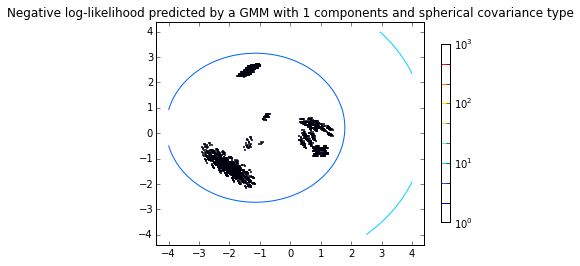

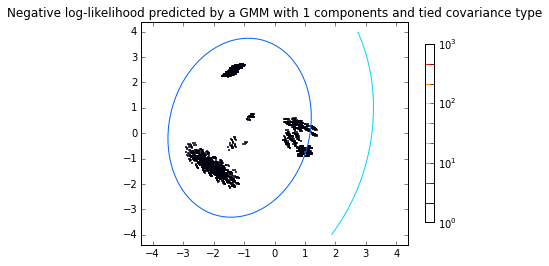

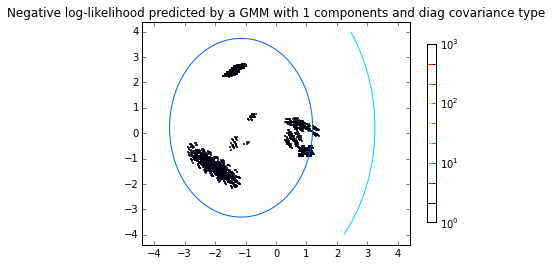

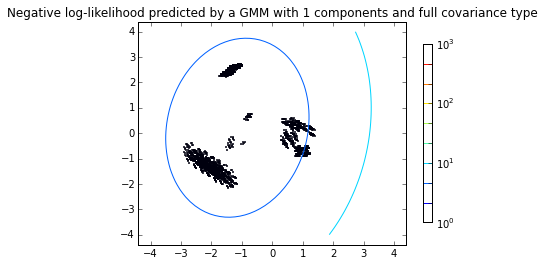

/home/hdanish/anaconda/lib/python2.7/site-packages/matplotlib/contour.py:1516: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


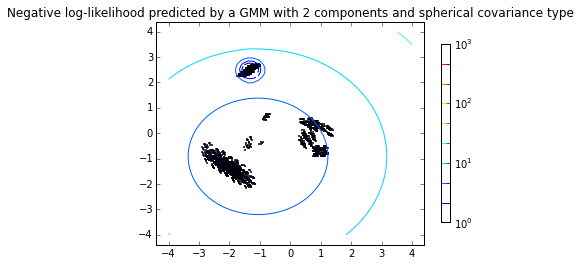

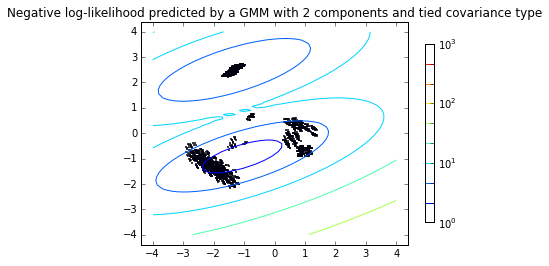

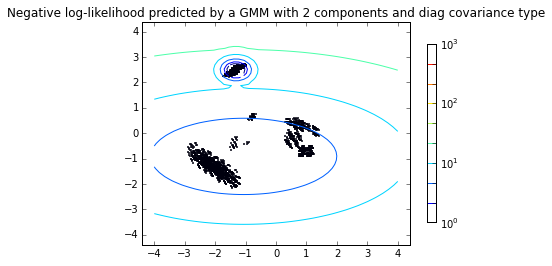

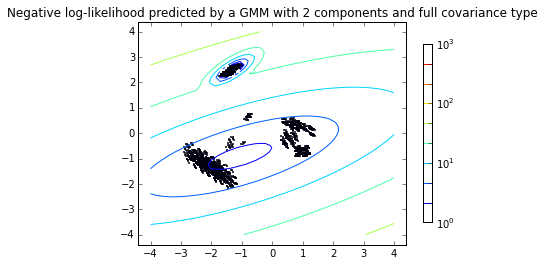

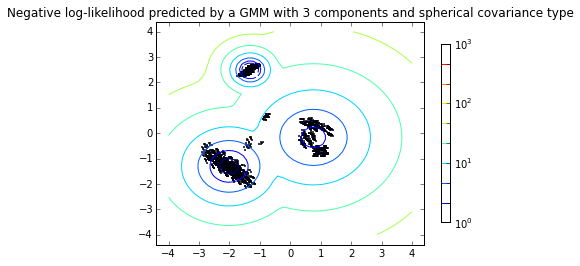

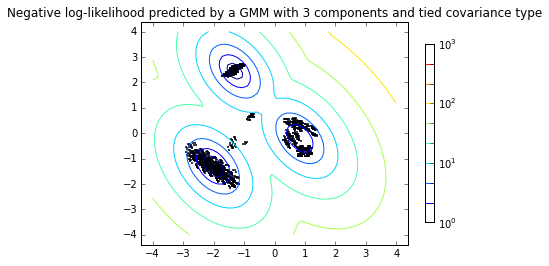

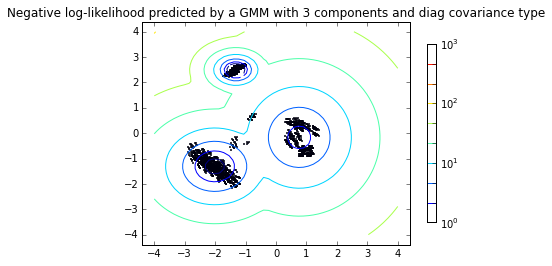

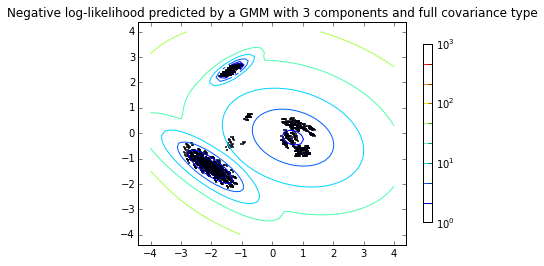

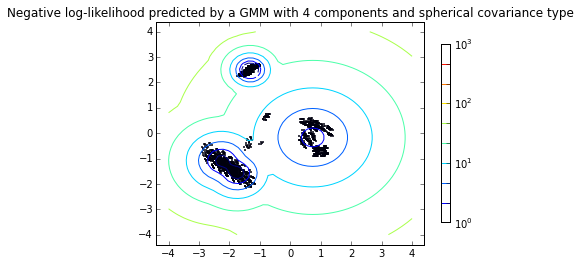

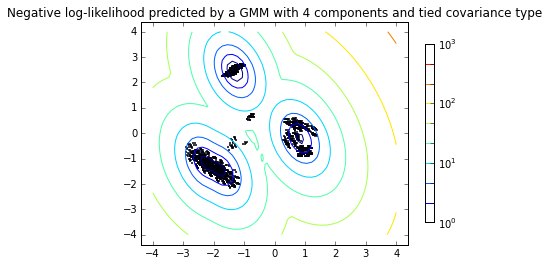

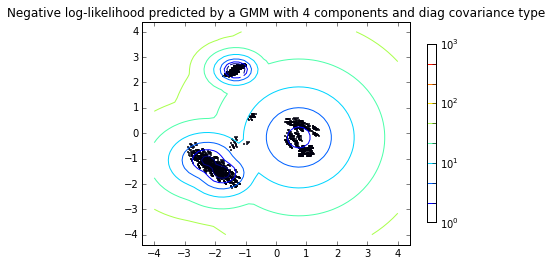

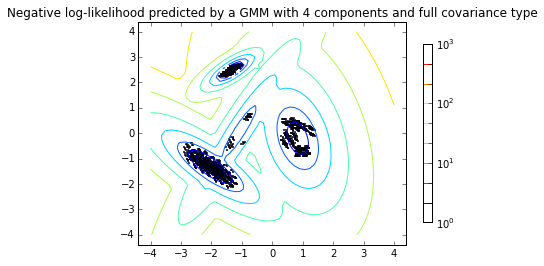

In [9]:
def P4():
### STUDENT START ###
    n_comp = 2
    pca_mod4 = PCA(n_components = n_comp)
    train_data_2d = pca_mod4.fit_transform(train_data, train_labels)  
    pos_train_data_2d = train_data_2d[train_labels==1]
    neg_train_data_2d = train_data_2d[train_labels==0]
    
    structures = ['spherical', 'tied', 'diag', 'full']
    comps = [1, 2, 3, 4]
    
    # Loop through the different number of components and structures
    for comp in comps:
        for struct in structures:
            # Create a GMM with the aforementioned parameters and fit it to the positive dataset
            gm_mod = GMM(n_components = comp, covariance_type = struct)        
            gm_mod.fit(pos_train_data_2d)
            
            # Setup plotting parameters
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-4.0, 4.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gm_mod.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(pos_train_data_2d[:, 0], pos_train_data_2d[:, 1], .8)

            plt.title('Negative log-likelihood predicted by a GMM with %s components and %s covariance type' \
                     % (comp, struct))
            plt.axis('tight')
            plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [87]:
def P5():
### STUDENT START ###
    n_comp = 2
    pca_mod5 = PCA(n_components = n_comp)
    train_data_2d = pca_mod5.fit_transform(train_data, train_labels)
    test_data_2d = pca_mod5.transform(test_data) # Also transform the test data for later use in score
    pos_train_data_2d = train_data_2d[train_labels==1]
    neg_train_data_2d = train_data_2d[train_labels==0]
    
    # Create the GMMs for the positive and negative examples
    gm_mod_pos = GMM(n_components = 4, covariance_type = 'full')
    gm_mod_pos.fit(pos_train_data_2d)
    
    gm_mod_neg = GMM(n_components = 4, covariance_type = 'full')
    gm_mod_neg.fit(neg_train_data_2d)
    
    # Predict the test examples
    pred_gm_pos = gm_mod_pos.score(test_data_2d)
    pred_gm_neg = gm_mod_neg.score(test_data_2d)
    
    # Create a consolidated list of test example predictions for the model that gives a larger probability
    predictions = [int(pred_gm_pos[i] >= pred_gm_neg[i]) for i in range(len(test_data_2d))]
    
    # Compare the number of same predictions to the test labels
    same = sum(i == j for i, j in zip(predictions, test_labels))
    
    print "Accuracy of the predictions is %f" % (float(same)/len(test_labels))
### STUDENT END ###

P5()

Accuracy of the predictions is 0.951068


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [7]:
# Helper function to calculate the number of parameters based on different inputs
def get_num_params(n_features, n_components, n_classes, covar_type):
    if covar_type == 'spherical':
        return ((n_features * n_components) + (n_components - 1) + n_components) * n_classes
    elif covar_type == 'diag':
        return ((n_features * n_components) + (n_components - 1) + (n_features * n_components)) * n_classes
    elif covar_type == 'tied':
        return ((n_features * n_components) + (n_components - 1) + (n_features + n_features * (n_features - 1) / 2)) * n_classes
    elif covar_type == 'full':
        return ((n_features * n_components) + (n_components - 1) + (n_features + n_features * (n_features - 1) / 2) * n_components) * n_classes
    else:
        return 0
    
def P6():
### STUDENT START ###
    # Setup inputs
    structures = ['spherical', 'tied', 'diag', 'full']
    features = [1, 2, 3, 4, 5]
    components = [1, 2, 3, 4, 5]
    
    # Setup final variables for reporting best results
    best_accuracy = 0.0
    best_struct = ''
    best_n_features = 0
    best_n_components = 0
    best_n_params = 0
    
    # Loop through the inputs
    for struct in structures:
        for n_features in features:
            for n_components in components:
                n_params = get_num_params(n_features, n_components, 2, struct)
                
                # If the number of parameters is greater than 50, discard the results
                if n_params > 50:
                    break
                
                pca_mod6 = PCA(n_components = n_features)
                train_data_2d = pca_mod6.fit_transform(train_data, train_labels)
                test_data_2d = pca_mod6.transform(test_data)
                pos_train_data_2d = train_data_2d[train_labels==1]
                neg_train_data_2d = train_data_2d[train_labels==0]

                gm_mod_pos = GMM(n_components = n_components, covariance_type = struct)
                gm_mod_pos.fit(pos_train_data_2d)

                gm_mod_neg = GMM(n_components = n_components, covariance_type = struct)
                gm_mod_neg.fit(neg_train_data_2d)

                pred_gm_pos = gm_mod_pos.score(test_data_2d)
                pred_gm_neg = gm_mod_neg.score(test_data_2d)

                predictions = [int(pred_gm_pos[i] >= pred_gm_neg[i]) for i in range(len(test_data_2d))]

                same = sum(i == j for i, j in zip(predictions, test_labels))

                accuracy = float(same)/len(test_labels)
                
                print "Model is a %s PCA components, %s-component %s covariance GMMs with accuracy %s and %s parameters" % (n_features, n_components, struct, accuracy, n_params)
                
                # If current accuracy is better than previous accuracy, then store inputs as the best
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_struct = struct
                    best_n_features = n_features
                    best_n_components = n_components
                    best_n_params = n_params
        
    print "\n\nBest model is a %s PCA components, %s-component %s covariance GMMs with accuracy %s and %s parameters" % (best_n_features, best_n_components, best_struct, best_accuracy, best_n_params)
### STUDENT END ###

P6()

Model is a 1 PCA components, 1-component spherical covariance GMMs with accuracy 0.844306049822 and 4 parameters
Model is a 1 PCA components, 2-component spherical covariance GMMs with accuracy 0.899466192171 and 10 parameters
Model is a 1 PCA components, 3-component spherical covariance GMMs with accuracy 0.903024911032 and 16 parameters
Model is a 1 PCA components, 4-component spherical covariance GMMs with accuracy 0.913701067616 and 22 parameters
Model is a 1 PCA components, 5-component spherical covariance GMMs with accuracy 0.906583629893 and 28 parameters
Model is a 2 PCA components, 1-component spherical covariance GMMs with accuracy 0.860320284698 and 6 parameters
Model is a 2 PCA components, 2-component spherical covariance GMMs with accuracy 0.873665480427 and 14 parameters
Model is a 2 PCA components, 3-component spherical covariance GMMs with accuracy 0.943060498221 and 22 parameters
Model is a 2 PCA components, 4-component spherical covariance GMMs with accuracy 0.9457295